# Creating and Backtesting EMA Strategies

## Getting the Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("seaborn")

In [2]:
data = pd.read_csv("eurusd.csv", parse_dates = ["Date"], index_col = "Date")

In [3]:
data

,price
Date,
2004-01-01,1.258194
2004-01-02,1.258194
2004-01-05,1.268698
2004-01-06,1.272103
2004-01-07,1.264095
...,...
2020-06-24,1.131235
2020-06-25,1.125087
2020-06-26,1.122208


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4275 entries, 2004-01-01 to 2020-06-30
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   price   4275 non-null   float64
dtypes: float64(1)
memory usage: 66.8 KB


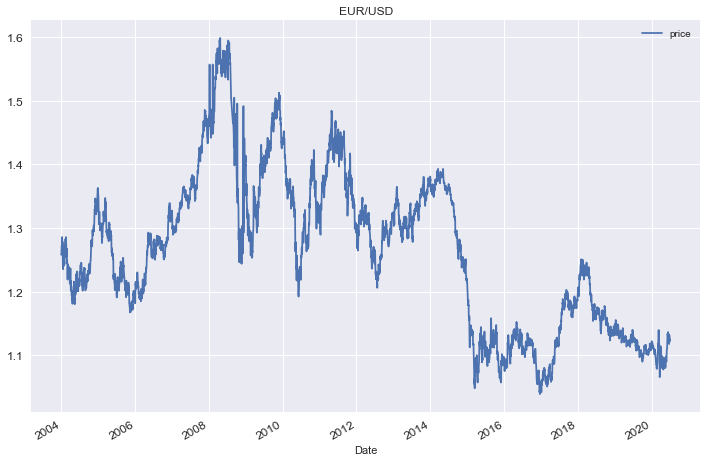

In [5]:
data.plot(figsize = (12, 8), title = "EUR/USD", fontsize = 12)
plt.show()

## EMA vs. SMA

In [6]:
data

,price
Date,
2004-01-01,1.258194
2004-01-02,1.258194
2004-01-05,1.268698
2004-01-06,1.272103
2004-01-07,1.264095
...,...
2020-06-24,1.131235
2020-06-25,1.125087
2020-06-26,1.122208


In [7]:
window = 50

In [8]:
data.price.ewm(span = window, min_periods = window).mean() 

Date
2004-01-01         NaN
2004-01-02         NaN
2004-01-05         NaN
2004-01-06         NaN
2004-01-07         NaN
                ...   
2020-06-24    1.109674
2020-06-25    1.110279
2020-06-26    1.110746
2020-06-29    1.111211
2020-06-30    1.111741
Name: price, Length: 4275, dtype: float64

In [9]:
data["EMA_S"] = data.price.ewm(span = window, min_periods = window).mean() 

In [10]:
data["SMA_S"] = data.price.rolling(window).mean() 

In [11]:
data

,price,EMA_S,SMA_S
Date,,,
2004-01-01,1.258194,NaN,NaN
2004-01-02,1.258194,NaN,NaN
2004-01-05,1.268698,NaN,NaN
2004-01-06,1.272103,NaN,NaN
2004-01-07,1.264095,NaN,NaN
...,...,...,...
2020-06-24,1.131235,1.109674,1.101794
2020-06-25,1.125087,1.110279,1.102486
2020-06-26,1.122208,1.110746,1.103213


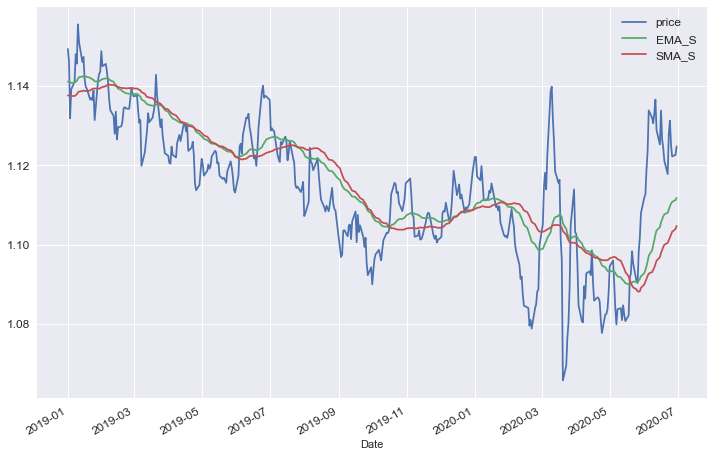

In [12]:
data.loc["2019":].plot(figsize = (12, 8), fontsize = 12)
plt.legend(fontsize = 12)
plt.show()

## Defining an EMA Crossover Strategy

In [13]:
data.drop(columns = ["EMA_S", "SMA_S"], inplace = True)

In [14]:
data

,price
Date,
2004-01-01,1.258194
2004-01-02,1.258194
2004-01-05,1.268698
2004-01-06,1.272103
2004-01-07,1.264095
...,...
2020-06-24,1.131235
2020-06-25,1.125087
2020-06-26,1.122208


In [15]:
ema_s = 50
ema_l = 200

In [16]:
data["EMA_S"] = data.price.ewm(span = ema_s, min_periods = ema_s).mean() 

In [17]:
data["EMA_L"] = data.price.ewm(span = ema_l, min_periods = ema_l).mean() 

In [18]:
data

,price,EMA_S,EMA_L
Date,,,
2004-01-01,1.258194,NaN,NaN
2004-01-02,1.258194,NaN,NaN
2004-01-05,1.268698,NaN,NaN
2004-01-06,1.272103,NaN,NaN
2004-01-07,1.264095,NaN,NaN
...,...,...,...
2020-06-24,1.131235,1.109674,1.106470
2020-06-25,1.125087,1.110279,1.106655
2020-06-26,1.122208,1.110746,1.106810


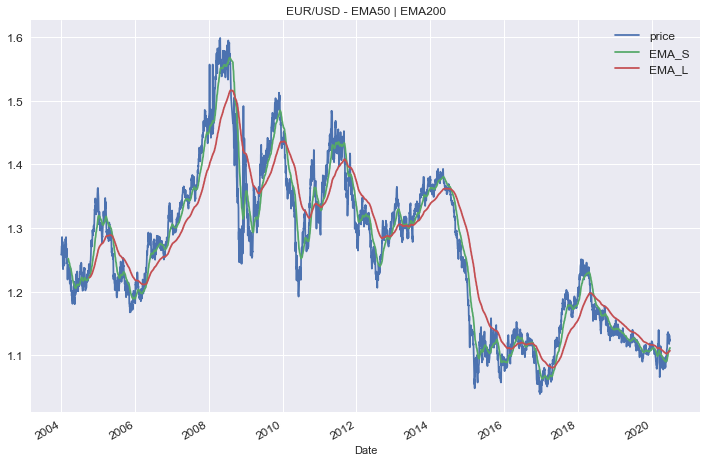

In [19]:
data.plot(figsize = (12, 8), title = "EUR/USD - EMA{} | EMA{}".format(ema_s, ema_l), fontsize = 12)
plt.legend(fontsize = 12)
plt.show()

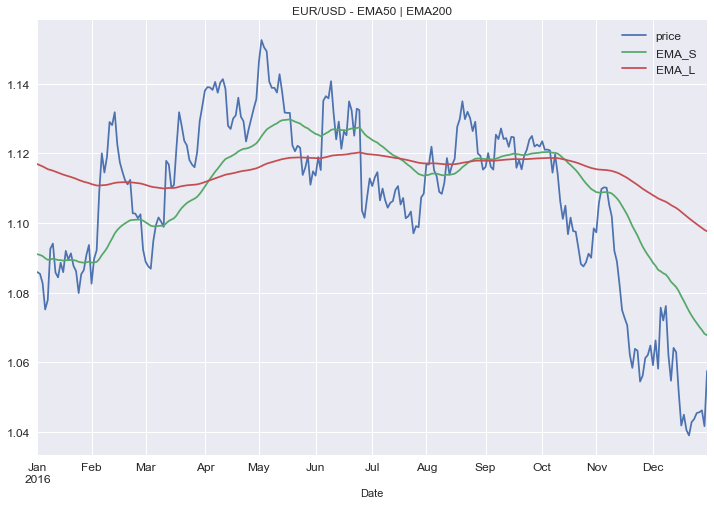

In [20]:
data.loc["2016", ["price", "EMA_S", "EMA_L"]].plot(figsize = (12, 8), fontsize = 12,
                                                   title = "EUR/USD - EMA{} | EMA{}".format(ema_s, ema_l))
plt.legend(fontsize = 12)
plt.show()

In [21]:
data["position"] = np.where(data["EMA_S"] > data["EMA_L"], 1, -1 )

In [22]:
data

,price,EMA_S,EMA_L,position
Date,,,,
2004-01-01,1.258194,NaN,NaN,-1
2004-01-02,1.258194,NaN,NaN,-1
2004-01-05,1.268698,NaN,NaN,-1
2004-01-06,1.272103,NaN,NaN,-1
2004-01-07,1.264095,NaN,NaN,-1
...,...,...,...,...
2020-06-24,1.131235,1.109674,1.106470,1
2020-06-25,1.125087,1.110279,1.106655,1
2020-06-26,1.122208,1.110746,1.106810,1


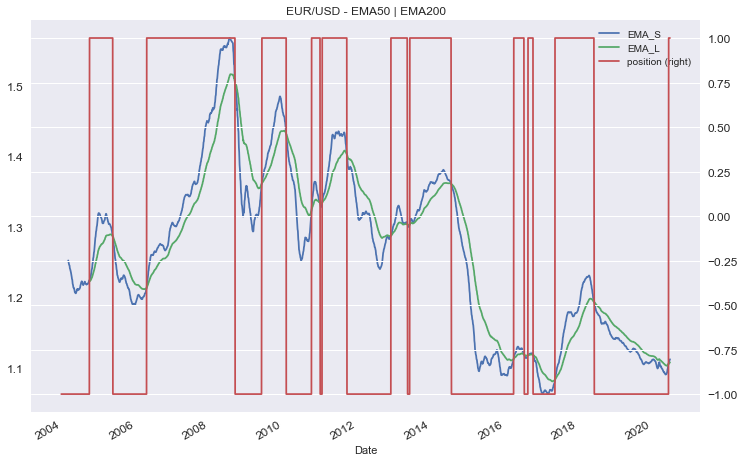

In [23]:
data.loc[:, ["EMA_S", "EMA_L", "position"]].plot(figsize = (12, 8), fontsize = 12, secondary_y = "position",
                                                 title = "EUR/USD - EMA{} | EMA{}".format(ema_s, ema_l))
plt.show()

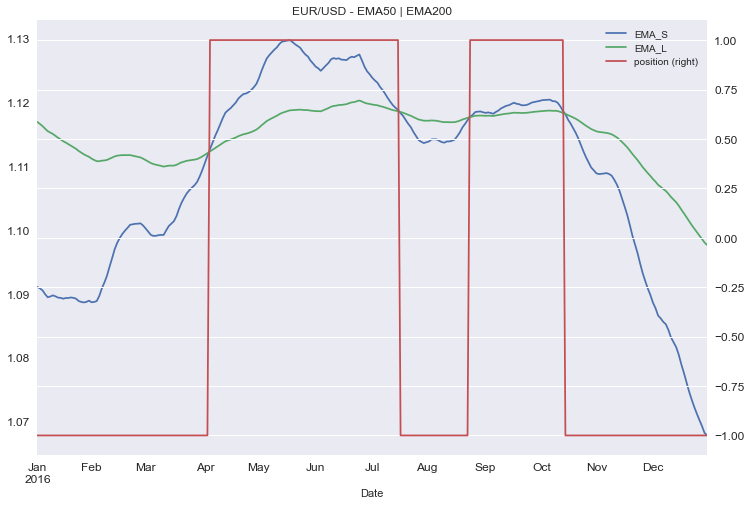

In [24]:
data.loc["2016", ["EMA_S", "EMA_L", "position"]].plot(figsize = (12, 8), fontsize = 12, secondary_y = "position",
                                                     title = "EUR/USD - EMA{} | EMA{}".format(ema_s, ema_l))
plt.show()

## Vectorized Strategy Backtesting

In [ ]:
data

In [ ]:
data["returns"] = np.log(data.price.div(data.price.shift(1)))

In [ ]:
data.dropna(inplace = True)

In [ ]:
data

In [ ]:
data["strategy"] = data.position.shift(1) * data["returns"]

In [ ]:
data

In [ ]:
data.dropna(inplace = True)

In [ ]:
ptc = 0.00007

In [ ]:
data["trades"] = data.position.diff().fillna(0).abs()

In [ ]:
data.trades.value_counts()

In [ ]:
data["strategy_net"] = data.strategy - data.trades * ptc

In [ ]:
data["creturns"] = data["returns"].cumsum().apply(np.exp)
data["cstrategy"] = data["strategy"].cumsum().apply(np.exp)
data["cstrategy_net"] = data["strategy_net"].cumsum().apply(np.exp)

In [ ]:
data

In [ ]:
data[["creturns", "cstrategy", "cstrategy_net"]].plot(figsize = (12 , 8))
plt.show()

In [ ]:
data.loc["2020", ["creturns", "cstrategy", "cstrategy_net"]].plot(figsize = (12 , 8))
plt.show()

## Using the EMABacktester Class

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import brute
plt.style.use("seaborn")

In [ ]:
from EMABacktester import EMABacktester as EMA

In [ ]:
ptc = 0.00007

In [ ]:
tester = EMA("EURUSD=X", 50, 200, "2004-01-01", "2020-06-30", ptc)

In [ ]:
tester

In [ ]:
tester.test_strategy()

In [ ]:
tester.plot_results()

In [ ]:
tester.optimize_parameters((25, 75, 1), (100, 200, 1))

In [ ]:
tester.plot_results()

__Special Case: Price/EMA Crossover__

In [ ]:
tester.set_parameters(1, 50)

In [ ]:
tester.test_strategy()

In [ ]:
tester.plot_results()

In [ ]:
tester.results.trades.value_counts()

__AUD / EUR__

In [ ]:
tester = EMA("AUDEUR=X", 50, 200, "2004-01-01", "2020-06-30", 0)

In [ ]:
tester.test_strategy()

In [ ]:
tester.plot_results()

In [ ]:
tester.optimize_parameters((25, 75, 1), (100, 200, 1))

In [ ]:
tester.plot_results()